#  COGS18 Projects Analysis: Introduction to Python Students Demonstrate Multiple Paths to Successful Final Projects

# Table of Contents <a class="anchor" id="Top"></a>

* [Overview](#Overview)
    * [Background](#Background)
* [Datasets](#Datasets)
    * [COGS18 pre-course surveys data](#Dataset1)
    * [Final projects data](#Dataset2)
* [Research Questions](#Research_Questions)
    * [Hypotheses](#Hypotheses)
* [Setup](#Setup)
* [Data Cleaning and Wrangling](#Data_Cleaning_and_Wrangling)
    * [Removing redundant columns](#Removing_redundant_columns)
    * [Null values](#Null_values)
    * [Abnormal values](#Abnormal_values)
    * [Programming experience](#Programming_experience)
    * [Imports](#Imports)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [Programming background](#Programming_background)
    * [Pre-skills](#Pre-skills)
    * [Length](#Length)
    * [Code documentation](#Code_documentation)
    * [Imports](#Imports)
    * [Complexity](#Complexity)
    * [Tests](#Tests)
    * [Instructors](#Instructors)
* [Analysis](#Analysis)
    * [Preparing the dataframe](#Preparing_the_dataframe)
    * [Decision tree](#Decision_tree)
    * [Random forest](#Random_forest)
* [Conclusion](#Conclusion)

# Overview <a class="anchor" id="Overview"></a>

Programming is a highly demanded skill in both academia and industry. Considering the fact that most students are first introduced to programming in college, it is reasonable to say that early-stage computer science education plays a big role in their future career/research. COGS 18 is one of the most popular introductory level programming courses at UCSD and is taken by more than 1,000 undergraduate students each academic year. Logistically, the course consists of assignments, labs, and a final project to assess students' learning outcomes. Among these tasks, the final project is reflective of a student's ability to learn, design, and implement a programming project independently. For students enrolled in this course or who plan to enroll, many may not be sure about what's a good final project or if they are capable of doing well in the final project. So in this COGS199 research project, I will quantitatively analyze COGS18 final projects from several past quarters to try to guide future students and future iterations of the course.

### Background <a class="anchor" id="Background"></a>

In Bryant, Sutner, and Stehlik's _Introductory Computer Science Education at Carnegie Mellon University: A Deans’ Perspective_, they indicated a significant purpose of an introductory programming course should be "promot(ing) the principles of computational thinking, for both majors and nonmajors" (2010). COGS18 is exactly the course that plays such role here at UCSD. Helping students to create successful COGS18 final projects would be part of the effort of promoting these principles and the fundamental goal of this project.

Source: http://www.cse.chalmers.se/edu/year/2019/course/TDA384_LP3/files/reading/CMU-CS-curriculum-2011.pdf

[Jump Back to Table of Contents](#Top)

# Datasets <a class="anchor" id="Datasets"></a>

### COGS18 pre-course surveys data <a class="anchor" id="Dataset1"></a>

Data in this dataset were collected from COGS18's pre-course surveys. The surveys were volunteerily completed by students enrolled in this course on the first week of instruction. Started in the winter 2020 quarter, students had the choice between a final project and final exam as the final assignment of this course. Data points in this dataset represents students who chose to complete the final projects. Here is a list of descriptions of relevant features within this dataset:
- project_name - students' projects' IDs
- programming_background - programming language(s) students used prior to this course, self-reported in the surveys
- pre_skills - programming skills that students acquired before entering this course, self-reported in the surveys. The options are:
    - "Describe and implement best practices in Python, keeping in mind that programming is done by and for humans"
    - "Program at an introductory level in the Python programming language"
    - "Solve basic problems using programmatic solutions"
    - "Write and debug small Python programs"
    - "Read basic Python programs, recognizing the structures they use and be able to explain how they work"
    - "Execute Python programs on your local computer, using notebooks and the command line"
- Total Score - students' score for the final project
- quarter - the quarter which the course was taught
- instructor - the instructor of the course in the specific quarter/section

[Jump Back to Table of Contents](#Top)

### Final projects data <a class="anchor" id="Dataset2"></a>

Data in this dataset were extracted from students' COGS18 final projects. The specifics of how the data were extracted can be found in /00_feature_engineering/scripts/feature_engineering.ipynb. Here is a list of descriptions of relevant features within this dataset:
- lines_code - number of lines of code in students' projects
- num_imports - number of imports in students' projects
- imports - lists of all the imports in students' projects
- lines_comments - number of lines of comments in students' projects
- num_functions - number of functions in students' projects
- num_classes - number of classes in students' projects
- num_tests - number of test functions in students' projects
- num_logic - number of in/else statements in students' projects
- num_loops - number of for/while loops in studens' projects

[Jump Back to Table of Contents](#Top)

# Research Questions <a class="anchor" id="Research_Questions"></a>

- How do a student's programming background and pre-skills affect their cogs18 final project's total score?
- How do the packages and the number of packages a student imports in their cogs18 final project affect the total score?
- How does the length (lines of code) of a student's cogs18 final project affect their total score?
- How does a student's code documentation (lines of comments, total words of comments) in their cogs18 final project affect the total score?
- How does the complexity (functions, classes, logics, loops) of a student's cogs18 final project affect the total score?
- How does test cases a student write in their cogs18 final project affect the total score?

### Hypotheses <a class="anchor" id="Hypotheses"></a>

- Students with more programming background and pre-skills would perform better in the final project, since they are more familiar with the course materials.
- The packages and number of packages students imports would not affect the total score, because it's not part of the grading rubric.
- As long as the project meet all grading criteria, the length of the project should not affect a student's total score.
- Students with more code documentation would perform better in the final project since it keeps their projects more organized.
- Since it is an introductory course, the complexity of the project would not significantly affect the total score.
- Since four minimum test cases are required, students with less than four test cases would receive a lower total score.


[Jump Back to Table of Contents](#Top)

# Setup <a class="anchor" id="Setup"></a>

In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# read in the dataset

df = pd.read_csv("/Users/haoyangguo/Documents/GitHub/cogs18_projects/01_data_analysis/csv/cogs18_projects.csv")

In [3]:
df.head()

,project_name,total_points,programming_background,pre_skills,Concept (Total),File Structure (Total),Project Description (Total),Approach (Total),Code (Total),Style (Total),...,imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,project_quarter
0,WI21_B00_001,98.50,I've never programmed before!,None of these,5.0,4.5,10.0,20.0,28.0,10.0,...,[],41,252,4,0,2,5,5,1,WI21
1,WI21_B00_002,99.53,I've never programmed before!,None of these,5.0,4.5,10.0,20.0,27.0,10.0,...,"['sys', 'pandas', 'numpy', 'my_module.functions']",52,299,3,0,3,18,9,3,WI21
2,WI21_B00_003,92.97,I've never programmed before!,None of these,5.0,4.5,10.0,20.0,30.0,10.0,...,"['datetime', 'numpy', 'pandas', 'matplotlib.py...",57,302,4,0,4,7,2,2,WI21
3,WI21_B00_004,94.69,Matlab,"Read basic Python programs, recognizing the st...",5.0,5.0,0.0,18.0,30.0,10.0,...,['string'],71,298,8,0,3,9,12,5,WI21
4,WI21_B00_005,98.72,I've never programmed before!,None of these,5.0,4.5,10.0,20.0,27.0,10.0,...,"['sys', 'my_module.functions']",18,167,4,1,3,12,1,0,WI21


[Jump Back to Table of Contents](#Top)

# Data Cleaning and Wrangling <a class="anchor" id="Data_Cleaning_and_Wrangling"></a>

In [4]:
df.shape

(142, 29)

### Removing redundant columns <a class="anchor" id="Removing_redundant_columns"></a>

In [5]:
df.columns

Index(['project_name', 'total_points', 'programming_background', 'pre_skills',
       'Concept (Total)', 'File Structure (Total)',
       'Project Description (Total)', 'Approach (Total)', 'Code (Total)',
       'Style (Total)', 'Documentation (Total)', 'Tests (Total)',
       'Fudge Points', 'Extra Credit', 'Total Score', 'instructor', 'quarter',
       'lines_code', 'num_imports', 'imports', 'lines_comments',
       'num_comments_words', 'num_functions', 'num_classes', 'num_tests',
       'num_asserts', 'num_logic', 'num_loops', 'project_quarter'],
      dtype='object')

Since I'm focusing on the grades related to the final project, I will remove the total_point (overall grade) column

In [6]:
df = df.drop(columns=["quarter", "total_points", 'Concept (Total)', 'File Structure (Total)',
      'Project Description (Total)', 'Approach (Total)', 'Code (Total)',
       'Style (Total)', 'Documentation (Total)', 'Tests (Total)'])

[Jump Back to Table of Contents](#Top)

### Null values <a class="anchor" id="Null_values"></a>

In [7]:
# checking null values

print(list(df.columns[df.isnull().any()]))
print(df.isna().sum())

['programming_background', 'pre_skills', 'Fudge Points', 'Extra Credit', 'Total Score']
project_name                0
programming_background     12
pre_skills                 12
Fudge Points              142
Extra Credit              142
Total Score                 2
instructor                  0
lines_code                  0
num_imports                 0
imports                     0
lines_comments              0
num_comments_words          0
num_functions               0
num_classes                 0
num_tests                   0
num_asserts                 0
num_logic                   0
num_loops                   0
project_quarter             0
dtype: int64


Fudge points and extra credit are already added to the total score, so I'll remove these two columns

In [8]:
df = df.drop(columns=["Fudge Points", "Extra Credit"])

The null values in the total score columns indicate that these students did the final exam instead of the final projects, so I will drop these rows

In [9]:
df[df["Total Score"].isna()]

,project_name,programming_background,pre_skills,Total Score,instructor,lines_code,num_imports,imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,project_quarter
9,WI21_B00_010,Javascript,None of these,NaN,Ellis,8,2,"['sys', 'my_module.functions']",9,55,2,0,2,2,0,0,WI21
126,SP21_C00_079,I've never programmed before!,Program at an introductory level in the Python...,NaN,Bardolph,8,2,"['sys', 'my_module.functions']",9,55,2,0,2,2,0,0,SP21


In [10]:
df.dropna(subset=["Total Score"], how='all', inplace=True)

The null values in the programming_background and pre_skills columns indicate that the student didn't answer the related question in the survey. I will replace them with the default "I've never programmed before!" and "None of these" options.

In [11]:
df["programming_background"] = df["programming_background"].fillna("I've never programmed before!")
df["pre_skills"] = df["pre_skills"].fillna("None of these")

In [12]:
df.isna().sum().sum()

0

There aren't any null values in this dataframe anymore. Next, I will move on to the abnormal values.

[Jump Back to Table of Contents](#Top)

### Abnormal values <a class="anchor" id="Abnormal_values"></a>

In [13]:
df[df["Total Score"]==0]

,project_name,programming_background,pre_skills,Total Score,instructor,lines_code,num_imports,imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,project_quarter
26,SP21_B00_005,"Java, Javascript",Program at an introductory level in the Python...,0.0,Ellis,96,2,"['sys', 'my_module.functions']",9,55,16,2,2,2,7,9,SP21
63,SP21_C00_017,I've never programmed before!,None of these,0.0,Bardolph,73,2,"['sys', 'my_module.functions']",18,351,4,0,4,13,2,4,SP21
81,SP21_C00_035,"I've never programmed before!, Python",Write and debug small Python programs,0.0,Bardolph,8,2,"['sys', 'my_module.functions']",9,55,2,0,2,2,0,0,SP21


In [14]:
score_columns = (df.columns)[:13]
(df[df["Total Score"]==0])[score_columns]

,project_name,programming_background,pre_skills,Total Score,instructor,lines_code,num_imports,imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests
26,SP21_B00_005,"Java, Javascript",Program at an introductory level in the Python...,0.0,Ellis,96,2,"['sys', 'my_module.functions']",9,55,16,2,2
63,SP21_C00_017,I've never programmed before!,None of these,0.0,Bardolph,73,2,"['sys', 'my_module.functions']",18,351,4,0,4
81,SP21_C00_035,"I've never programmed before!, Python",Write and debug small Python programs,0.0,Bardolph,8,2,"['sys', 'my_module.functions']",9,55,2,0,2


By checking with the instructor of the course, I discovered that these three projects violated academic integrity, so I will remove them from the dataframe.

In [15]:
df = df[df["Total Score"] != 0]

Next, I'll take a look at extremely low scores, as defined by a project receiving less than 50% of the possible points.

In [16]:
df[df["Total Score"] < 50]

,project_name,programming_background,pre_skills,Total Score,instructor,lines_code,num_imports,imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,project_quarter
102,SP21_C00_056,I've never programmed before!,None of these,12.0,Bardolph,8,2,"['sys', 'my_module.functions']",9,55,2,0,2,2,0,0,SP21


This project is an outlier in terms of its total score. After discussion with the professor, it was determined this was a student who took the course P/NP and only needed a few points to pass the course. As such, it is not reflective of a typical COGS 18 project and will be removed from analysis.

In [17]:
df = df[df["Total Score"] >= 50]

[Jump Back to Table of Contents](#Top)

### Programming experience <a class="anchor" id="Programming_experience"></a>

In [18]:
df["programming_background"].unique()

array(["I've never programmed before!", 'Matlab', 'C/C++', 'Python, Java',
       'Java, C/C++', 'Java', 'Python, Java, C/C++', 'Maple', 'Python',
       'Python, Java, Javascript', 'Java, R, C/C++',
       'Java, Javascript, SPSS', 'R', 'Javascript', 'HTML',
       'Java, Javascript, C/C++', 'Python, Java, R', 'Python, R',
       "I've done a little coding in shell for my microbiology lab",
       "I've never programmed before!, Python",
       'Python, Java, Javascript, R, C/C++',
       'I have used MATLAB a little bit.',
       'Javascript, I took a class where we learned html and css',
       'the concepts in COGS 3',
       'R, Worked with R and STATA for other courses before but basically never programmed before.',
       'SQL'], dtype=object)

I will categorize these answers for easier analysis.

In [19]:
# categorizing programming background

def categorizing_programming_background(row):
    background = str(row["programming_background"])
    if ("I've never programmed before!" in background):
        return "None"
    elif (background == "Python"):
        return "Python"
    elif ("Python" in background and len(background)>6):
        return "Python+"
    elif ("Java" in background or "C/C++" in background or "Javascript" in background):
        return "Java/C/C++/Javascript"
    else:
        return "Other"

df["programming_background"] = df.apply (lambda row: categorizing_programming_background(row), axis=1)   

In [20]:
df["pre_skills"].unique()

array(['None of these',
       'Read basic Python programs, recognizing the structures they use and be able to explain how they work, Solve basic problems using programmatic solutions, Execute Python programs on your local computer, using notebooks and the command line',
       'Solve basic problems using programmatic solutions',
       'Solve basic problems using programmatic solutions, Execute Python programs on your local computer, using notebooks and the command line',
       'Program at an introductory level in the Python programming language, Write and debug small Python programs',
       'Read basic Python programs, recognizing the structures they use and be able to explain how they work, Solve basic problems using programmatic solutions',
       'Program at an introductory level in the Python programming language, Read basic Python programs, recognizing the structures they use and be able to explain how they work, Solve basic problems using programmatic solutions, Write and deb

Firstly, I will one-hot encode the pre-skills, then I will catagorize them to advanced_skill, intermediate_skills, and basic_skills for easier analysis.

In [21]:
# one-hot encode pre-skills

skills_list = ["Describe and implement best practices in Python, keeping in mind that programming is done by and for humans",
               "Program at an introductory level in the Python programming language",
               "Solve basic problems using programmatic solutions",
               "Write and debug small Python programs",
               "Read basic Python programs, recognizing the structures they use and be able to explain how they work",
               "Execute Python programs on your local computer, using notebooks and the command line"]

# creating new columns
df_skills = pd.DataFrame(columns=skills_list)
df.join(df_skills, how="outer")

# one-hot encode
def one_hot_encoding_skills(row):
    if skill in row["pre_skills"]:
        return 1
    else:
        return 0
    
for skill in skills_list:
    df[skill] = df.apply (lambda row: one_hot_encoding_skills(row), axis=1)

In [22]:
# categorzing pre-skills

advanced_skill = "Describe and implement best practices in Python, keeping in mind that programming is done by and for humans"
intermediate_skills = [ "Solve basic problems using programmatic solutions",
                      "Write and debug small Python programs"]
basic_skills = ["Read basic Python programs, recognizing the structures they use and be able to explain how they work",
               "Execute Python programs on your local computer, using notebooks and the command line",
               "Program at an introductory level in the Python programming language"]

def categorizing_pre_skills(row):
    skills = row["pre_skills"]
    
    if advanced_skill in skills:
        return "Advanced"
    elif "None of these" in skills:
        return "None"
    else:
        have_intermediate_skill = False
        for intermediate_skill in intermediate_skills:
            if intermediate_skill in skills:
                have_intermediate_skill = True
        
        if have_intermediate_skill==True:
            return "Intermediate"
        else:
            return "Basic"
        

df["pre_skills"] = df.apply(lambda row: categorizing_pre_skills(row), axis=1)         

[Jump Back to Table of Contents](#Top)

### Imports <a class="anchor" id="Imports"></a>

In [23]:
# converting data stored in each cell to lists

df["imports"] = df["imports"].apply(eval)

[Jump Back to Table of Contents](#Top)

# Exploratory Data Analysis <a class="anchor" id="Exploratory_Data_Analysis"></a>

First, I'll skim through the quantitative data in the dataframe. In order to explore more on the aspect of what makes a project great, I'll create a new dataframes that only contains projects from students whose total score is at or above the 75 percentile.

In [24]:
df.describe()

,Total Score,lines_code,num_imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,"Describe and implement best practices in Python, keeping in mind that programming is done by and for humans",Program at an introductory level in the Python programming language,Solve basic problems using programmatic solutions,Write and debug small Python programs,"Read basic Python programs, recognizing the structures they use and be able to explain how they work","Execute Python programs on your local computer, using notebooks and the command line"
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,90.407353,101.617647,3.500000,66.411765,397.169118,7.044118,0.698529,4.205882,9.985294,6.845588,2.477941,0.044118,0.095588,0.227941,0.095588,0.110294,0.073529
std,11.415744,93.662282,2.697049,59.911845,364.560914,5.132132,1.661413,2.908780,9.029979,9.621641,5.222412,0.206116,0.295113,0.421055,0.295113,0.314414,0.261968
min,56.000000,8.000000,0.000000,2.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.875000,46.750000,2.000000,26.000000,204.000000,4.000000,0.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.750000,80.000000,3.000000,53.000000,298.500000,5.000000,0.000000,3.000000,8.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98.500000,122.500000,4.000000,82.500000,485.000000,9.000000,1.000000,5.000000,12.000000,9.250000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,104.000000,601.000000,13.000000,397.000000,2614.000000,33.000000,14.000000,19.000000,57.000000,82.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As seen above, the 75 percentile of the total score is 98.5. I will also create another dataframe for the rest of the data points for future reference.

In [25]:
df_high_score = df[df["Total Score"] > 98.5]
df_rest = df[df["Total Score"] <= 98.5]
df_high_score.describe()

,Total Score,lines_code,num_imports,lines_comments,num_comments_words,num_functions,num_classes,num_tests,num_asserts,num_logic,num_loops,"Describe and implement best practices in Python, keeping in mind that programming is done by and for humans",Program at an introductory level in the Python programming language,Solve basic problems using programmatic solutions,Write and debug small Python programs,"Read basic Python programs, recognizing the structures they use and be able to explain how they work","Execute Python programs on your local computer, using notebooks and the command line"
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,100.969697,102.909091,3.969697,92.878788,519.242424,7.030303,0.484848,5.060606,12.787879,5.969697,3.909091,0.090909,0.181818,0.303030,0.090909,0.212121,0.060606
std,1.585774,66.781998,3.206291,47.769471,257.311464,3.404821,0.667140,2.331032,6.318413,5.531076,8.133125,0.291937,0.391675,0.466694,0.291937,0.415149,0.242306
min,99.000000,29.000000,0.000000,39.000000,211.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,53.000000,2.000000,56.000000,302.000000,5.000000,0.000000,3.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,88.000000,3.000000,72.000000,450.000000,6.000000,0.000000,4.000000,11.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.000000,140.000000,6.000000,133.000000,735.000000,9.000000,1.000000,6.000000,18.000000,9.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,341.000000,13.000000,202.000000,1171.000000,15.000000,2.000000,12.000000,27.000000,20.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, I'll create a heatmap to get an overview of potential correlations between total scores and other numeric variables.

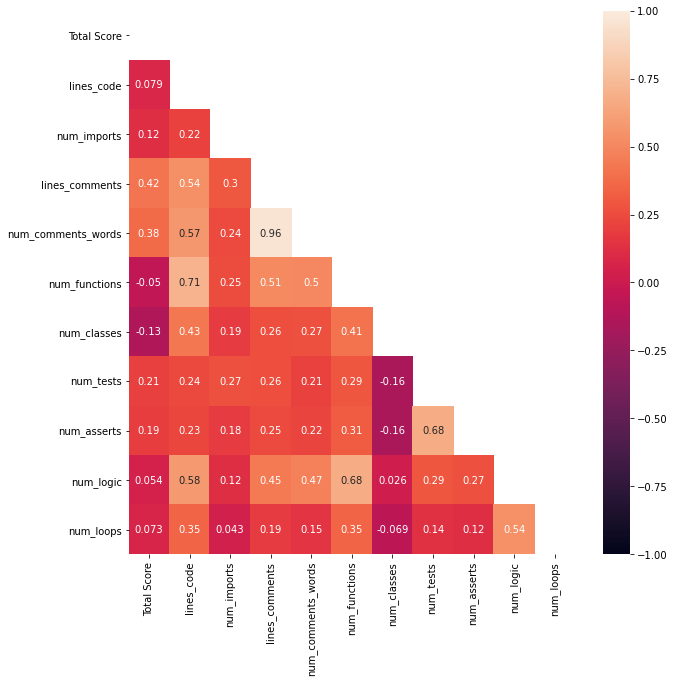

In [26]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(df[['Total Score', 'lines_code', 'num_imports',
       'lines_comments', 'num_comments_words', 'num_functions', 'num_classes',
       'num_tests', 'num_asserts', 'num_logic', 'num_loops']].corr(), dtype=bool))
p = sns.heatmap(df[['Total Score', 'lines_code', 'num_imports',
       'lines_comments', 'num_comments_words', 'num_functions', 'num_classes',
       'num_tests', 'num_asserts', 'num_logic', 'num_loops']].corr(), mask=mask, vmin=-1, vmax=1, annot=True)

According to the heatmap, there is no clear correlation between total scores and other numerical variables.  For the next step, I'll delve deep into each variable to seek hidden correlations and come up with practical insights.

[Jump Back to Table of Contents](#Top)

### Programming background <a class="anchor" id="Programming_background"></a>

To begin with, I'll look into data related to programming experience and analyze their relation with total scores. To clarify, the category python indicates that the student had programming experience in python and only python, and python+ indicates that the student had programming experience in python and other programming language(s).

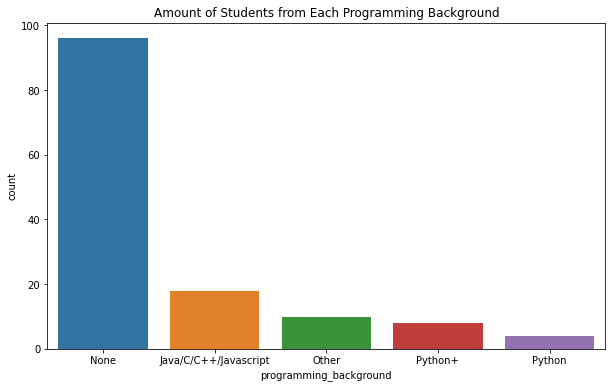

In [27]:
plt.figure(figsize=(10,6))
p = sns.countplot(data=df, x="programming_background", order = df["programming_background"].value_counts().index);
p.set_title("Amount of Students from Each Programming Background");

As shown in the count plot, most students entered this class without any programming background. One thing to point out is that there are only a few students with experience in Python (Python+ and Python). 

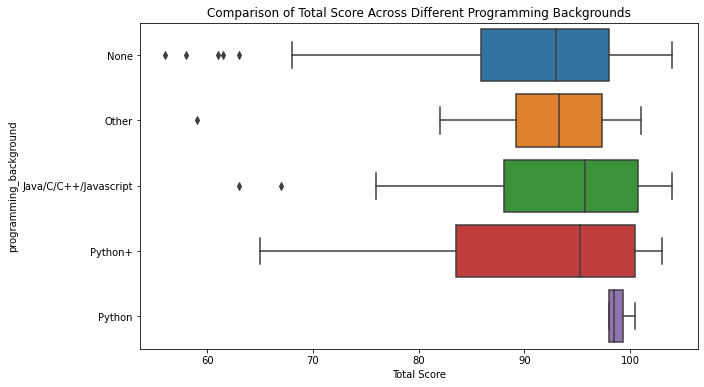

In [28]:
plt.figure(figsize=(10,6))
p = sns.boxplot(data=df, x="Total Score", y="programming_background");
p.set_title("Comparison of Total Score Across Different Programming Backgrounds");

The plot above is showing the distribution of the total score across different programming backgrounds. When comparing the median, students with Java/C/C++/Javascript/Python background score slightly higher than students with no a background. But if we look at the range, students with no background can score as high as students with backgrounds (maximum), and students with programming background could score lower than students with no background (minimum). It's reasonable to say that having a programming background cannot guarantee a high score on the final project.

Next, I will compare the average total score for students in each programming background group.

In [29]:
grouped_df = df.groupby("programming_background")
mean_df = grouped_df["Total Score"].mean()
mean_df

programming_background
Java/C/C++/Javascript    91.777778
None                     89.910417
Other                    90.100000
Python                   98.875000
Python+                  89.437500
Name: Total Score, dtype: float64

Although the average total score of students with python background is much higher than the other groups, this is likely due to the fact that the overall python-only population is quite small. When comparing students across various different programming backgrounds, the mean score is similar across groups.

Now, I'll specifically look into the projects which scored higher than the 75 percentile

In [30]:
percentage = df_high_score["programming_background"].value_counts()["None"]/(df_high_score["programming_background"].value_counts().sum()) * 100
print("The percentage of projects above 75 percentile done by students with no programming background: " + str(percentage) + "%")

The percentage of projects above 75 percentile done by students with no programming background: 54.54545454545454%


Among the best projects, approximately 54% of them were done by students with no programming background. This reinforces the fact that students with no programming background can do well in the final project. Thus, we can say that there is no clear evidence that students with a programming background would perform better on the final project.
# <span style='color:blue '> Insight #1: Students with a programming background before entering the class do not have an advantage on the final project. Students with no background can in fact score higher, therefore should be encouraged to complete the final project. </span>

[Jump Back to Table of Contents](#Top)

### Pre-skills <a class="anchor" id="Pre-skills"></a>

In the context of our survey, the pre-skills go hand in hand with the programming background. Thus, I expect that the pre-skills will not inform students' total scores on the project. The following count plot shows the number of students with each level of pre-skills.

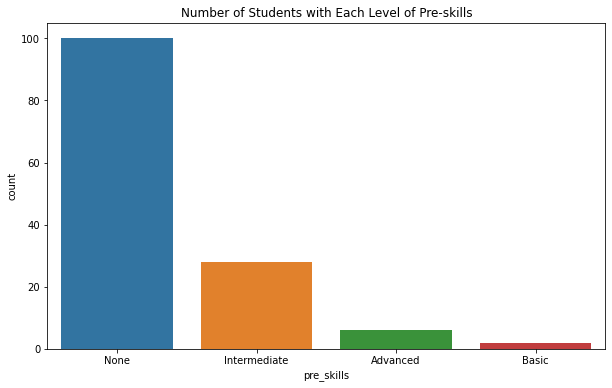

In [31]:
plt.figure(figsize=(10,6))
p = sns.countplot(data=df, x="pre_skills", order = df["pre_skills"].value_counts().index);
p.set_title("Number of Students with Each Level of Pre-skills");

As shown in the count plot, similar to programming background, most students came into this course with no prior skills. One thing to notice is that there are only a few students who claimed to have a basic level of pre-skill. Next, I'll take a look into the distribution of total scores from these student groups.

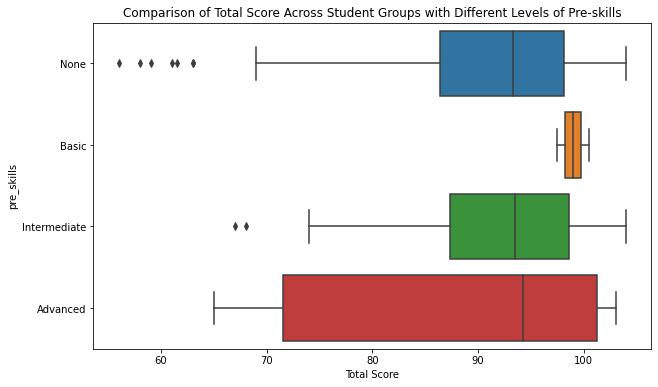

In [32]:
plt.figure(figsize=(10,6))
p = sns.boxplot(data=df, x="Total Score", y="pre_skills", order=["None", "Basic", "Intermediate", "Advanced"]);
p.set_title("Comparison of Total Score Across Student Groups with Different Levels of Pre-skills");

The plot above shows the distribution of total scores across student groups with different levels of pre-skills. There are several things worth noting:
- When it comes to the maximum, students with no pre-skills can score as high  as students with intermediate pre-skills. 
- When it comes to the minimum, some students who claimed to have advanced pre-skills performed worse than all other groups (excluding the outliers). 
- When comparing the medians, students with pre-skills performed slightly better than students with no pre-skills. But the difference is minimal.
- Students who claimed to have advanced level of pre-skills performed very differently among themselves. This is likely due to the fact that the pre-skills were self-reported.
- No conclusion can be made upon the basic pre-skill group since the population is way too small.

With these five points in mind, I'll look into the pre-skill individually to see how they differ in terms of their impact.

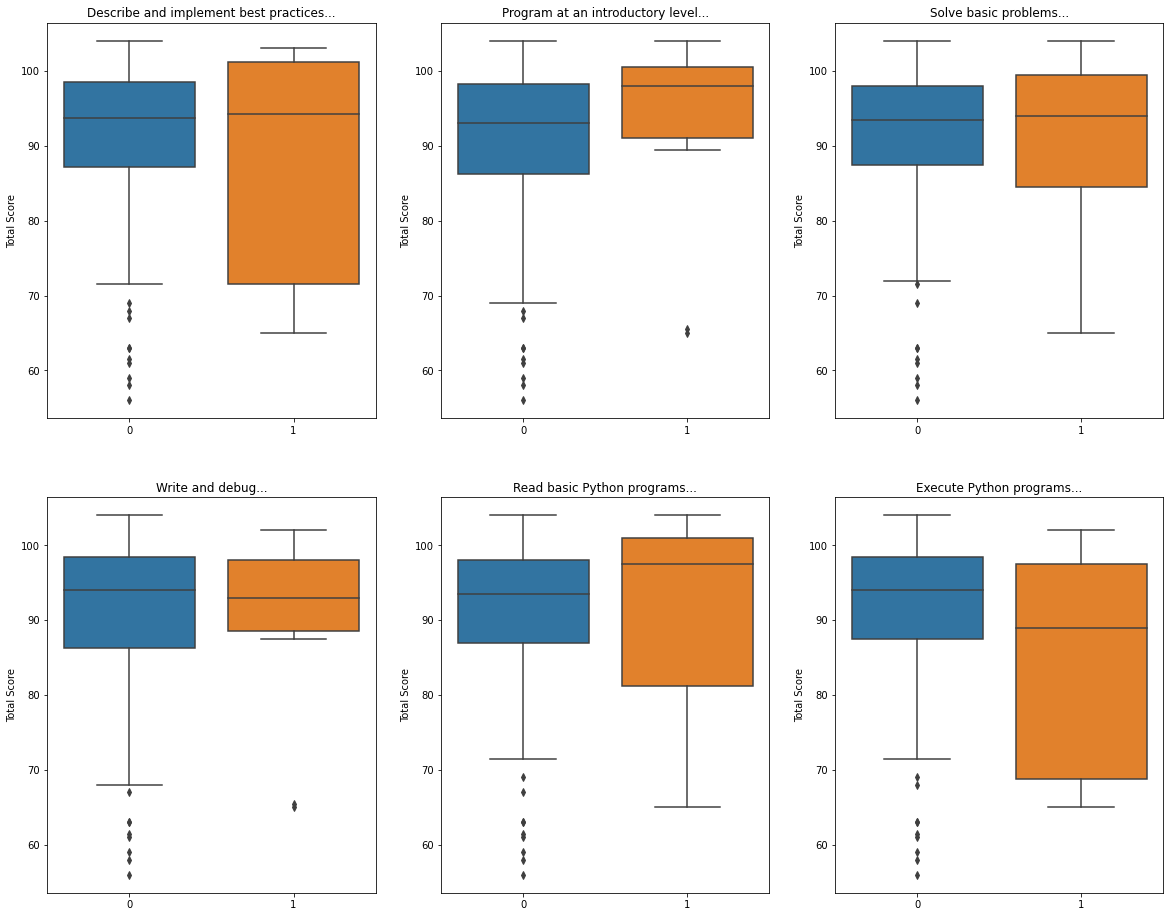

In [33]:
# individual boxplots 
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
p = sns.boxplot(data=df, y="Total Score", x="Describe and implement best practices in Python, keeping in mind that programming is done by and for humans");
p.set_title("Describe and implement best practices...")
p.set(xlabel=None)
plt.subplot(2,3,2)
p = sns.boxplot(data=df, y="Total Score", x="Program at an introductory level in the Python programming language");
p.set_title("Program at an introductory level...")
p.set(xlabel=None)
plt.subplot(2,3,3)
p = sns.boxplot(data=df, y="Total Score", x="Solve basic problems using programmatic solutions");
p.set_title("Solve basic problems...")
p.set(xlabel=None);
plt.subplot(2,3,4)
p = sns.boxplot(data=df, y="Total Score", x="Write and debug small Python programs");
p.set_title("Write and debug...")
p.set(xlabel=None)
plt.subplot(2,3,5)
p = sns.boxplot(data=df, y="Total Score", x="Read basic Python programs, recognizing the structures they use and be able to explain how they work");
p.set_title("Read basic Python programs...")
p.set(xlabel=None)
plt.subplot(2,3,6)
p = sns.boxplot(data=df, y="Total Score", x="Execute Python programs on your local computer, using notebooks and the command line");
p.set_title("Execute Python programs...")
p.set(xlabel=None);


When comparing students with (1) or without (0) these pre-skills (min, max, median, percentiles), we can see that:
- Program at an introductory level..., Write and debug..., and Execute Python programs... are the pre-skills that made a difference when it comes to the total score. Although the maximums are very much the same, these three pre-skills led to a minimum total score above 85.  
- In comparison, the other pre-skills did not make any significant difference.

Note that these boxplots represent the students with at least one pre-skill. Next, I will compare the average total score of students with at least one pre-skill and no pre-skills to conclude this part of exploration.

In [34]:
mean_w_pre_skills = df[df["pre_skills"]!="None"]["Total Score"].sum() / len(df[df["pre_skills"]!="None"])
mean_no_pre_skills = df[df["pre_skills"]=="None"]["Total Score"].sum() / len(df[df["pre_skills"]=="None"])

print("The average total score among students with no pre-skills is " + str(mean_no_pre_skills))
print("The average total score among students with at least one pre-skill is " + str(mean_w_pre_skills))

The average total score among students with no pre-skills is 90.314
The average total score among students with at least one pre-skill is 90.66666666666667


From the means, we can see that the impact on the total score of having any pre-skills is practically negligible. Last but not least, I'll take a look at the well-performing project.

In [35]:
percentage = df_high_score["pre_skills"].value_counts()["None"]/(df_high_score["pre_skills"].value_counts().sum()) * 100
print("The percentage of projects above 75 percentile done by students with no pre-skills: " + str(percentage) + "%")

The percentage of projects above 75 percentile done by students with no pre-skills: 66.66666666666666%


More than half of the best-performing final projects were done by students with no pre-skills. Gathering all the information we have regarding pre-skills and total scores, it is reasonable to say that there is no clear evidence that students who entered the class with more pre-skills would perform better on the final project.
# <span style='color:blue '> Insight #2: Students who already have programming skills before entering this class are not guaranteed to perform better on the final project. Among the skills, knowing how to "Program at an introductory level in the Python programming language", "Write and debug small Python programs", and "Read basic Python programs, recognizing the structures they use and be able to explain how they work" can be helpful, and students can definitely acquire these skills throughout the class.</span>

[Jump Back to Table of Contents](#Top)

### Length (lines of code) <a class="anchor" id="Length"></a>

In this section, I'll explore the relationship between the length of projects and total scores. First, I'll take a look at the distribution of lines of code included in the students' projects.

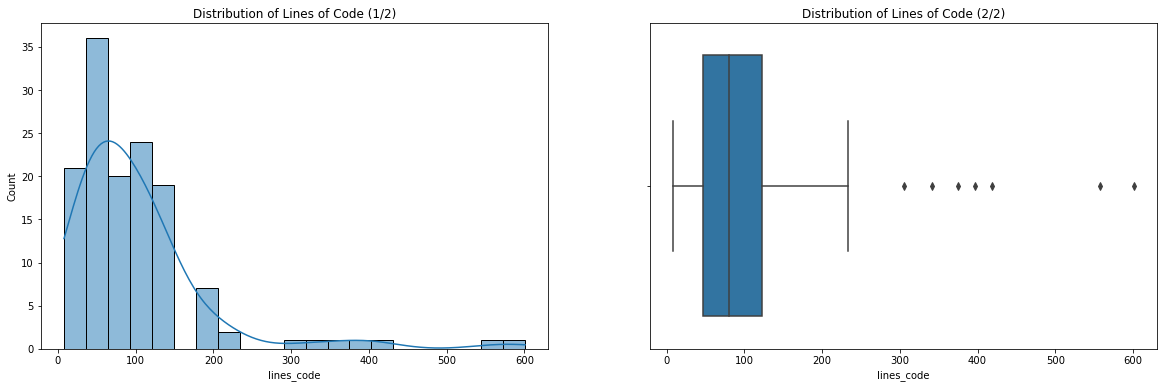

In [36]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.histplot(df["lines_code"], kde=True);
p.set_title("Distribution of Lines of Code (1/2)");
plt.subplot(1,2,2)
p = sns.boxplot(data=df, x="lines_code");
p.set_title("Distribution of Lines of Code (2/2)");

According to the histogram, there is a significant cluster around 30-150 lines of code, with a long right tail reaching up to 600 lines of code. Looking at the box plot, the interquartile range is also around 40-120 lines of code. These graphs indicate that most of the projects, regardless of their total score, are similar in length to each other. Next, I will try to see the correlation between lines of code and total scores.

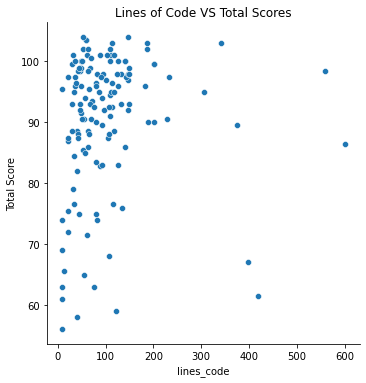

In [37]:
p = sns.relplot(data=df, x="lines_code", y="Total Score").set(title = "Lines of Code VS Total Scores");

Reflecting to the distribution above, we can see that most of the data points are clustered in terms of lines of code, while the total scores are distributed unaffected. Clearly, there is no linear correlation between lines of code and total score. To further support this assertion, I will look specifically at those exceptionally long projects.

In [38]:
df_long = df[df["lines_code"]>=300]
df_long["Total Score"]

15      67.0
38      95.0
43      98.5
50      89.5
62     103.0
131     86.5
134     61.5
Name: Total Score, dtype: float64

From these data points, we can see that longer projects do not necessarily lead to better scores. Next, I'll look into lines of code of the best projects. I will compare the medians to reduce the effect of outliers.

In [39]:
lines_code_median_high = df_high_score["lines_code"].median()
lines_code_median_the_rest = df_rest["lines_code"].median()

print("The median of the lines of code among the projects with high scores is " + str(lines_code_median_high))
print("The median of the lines of code among other projects is " + str(lines_code_median_the_rest))

The median of the lines of code among the projects with high scores is 88.0
The median of the lines of code among other projects is 80.0


Considering Python's syntax, 8 lines of code cannot make a significant difference when it comes to the quality of a project. This comparison indicates that the lengths of well-performing projects and other projects are practically the same.

In [40]:
df_high_score["lines_code"].describe()

count     33.000000
mean     102.909091
std       66.781998
min       29.000000
25%       53.000000
50%       88.000000
75%      140.000000
max      341.000000
Name: lines_code, dtype: float64

In conclusion, we can gain some insights by assessing these high-score projects.

# <span style='color:blue '> Insight #3: It is a misconception that longer projects would receive higher scores. Students should aim for better quality rather than longer length. A typical good project has approximately 50 to 140 lines of code.</span>

[Jump Back to Table of Contents](#Top)

### Code documentation (comments) <a class="anchor" id="Code_documentation"></a>

In this section, I'll explore the relation between code documentation and total scores. First, I'll take a look at the distribution of lines of comments.

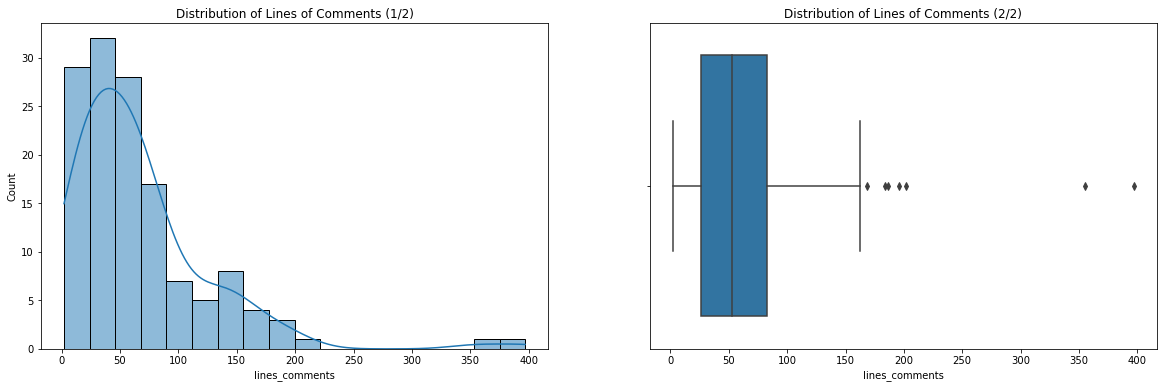

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.histplot(df["lines_comments"], kde=True);
p.set_title("Distribution of Lines of Comments (1/2)");
plt.subplot(1,2,2)
p = sns.boxplot(data=df, x="lines_comments");
p.set_title("Distribution of Lines of Comments (2/2)");

The distribution of lines of comments is very similar to lines of code. From the histogram, we can see that most projects have around 50 lines of comments. The boxplot also indicates a similar distribution to lines of code. Referring back to the heatmap, the correlation coefficient bewteen lines of comments and total scores is around 0.4, which is a potential weak correlation. A scatterplot could capture this correlation.

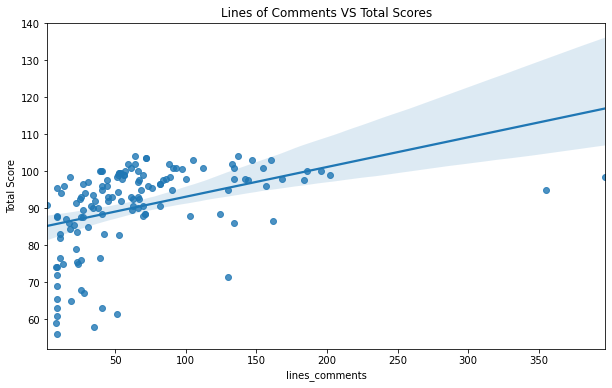

In [42]:
plt.figure(figsize=(10,6))
p = sns.regplot(data=df, x="lines_comments", y="Total Score").set(title = "Lines of Comments VS Total Scores");

The visualization of the regression model does indicate a weak linear correlation. Next, I'll specifically look into those well-performing projects and see if their code documentations differ from the rest.

In [43]:
lines_comments_median_high = df_high_score["lines_comments"].median()
lines_comments_median_the_rest = df_rest["lines_comments"].median()

print("The median of the lines of comments among the projects with high scores is " + str(lines_comments_median_high))
print("The median of the lines of comments among other projects is " + str(lines_comments_median_the_rest))

The median of the lines of comments among the projects with high scores is 72.0
The median of the lines of comments among other projects is 41.0


As shown above, there is a large difference between the medians of high-score projects and the rest of projects. Although the linear correlation is somewhwat weak, it is reasonable to say that projects with high scores tend to have longer code documentation. In addition, we can gain some insights by assessing these high-score projects.

In [44]:
df_high_score["lines_comments"].describe()

count     33.000000
mean      92.878788
std       47.769471
min       39.000000
25%       56.000000
50%       72.000000
75%      133.000000
max      202.000000
Name: lines_comments, dtype: float64

Code to comment ratios among the high-score projects are also worth to take a look.

In [45]:
df_high_score = df_high_score.copy()
df_high_score['code_comments_ratio'] = (df_high_score["lines_comments"] / df_high_score["lines_code"])
df_high_score['code_comments_ratio'].describe()

count    33.000000
mean      1.094167
std       0.467507
min       0.263682
25%       0.835821
50%       1.200000
75%       1.364865
max       1.967742
Name: code_comments_ratio, dtype: float64

As shown above, among the projects with high scores, the code to comments ratio is approximately 1:1.

# <span style='color:blue '> Insight #4: Documenting code is part of writing good code. In the scope of this course, projects with high scores tend to have more code documentation. A typical well-performing project has around 60 to 130 lines of comments, on par with lines of code.</span>

[Jump Back to Table of Contents](#Top)

### Imports <a class="anchor" id="Imports"></a>

Since COGS18 is an introductory course and there's no requirement for specific imports on the final project, I don't expect imports to have an influence on the total scores. As shown in the heatmap, the correlation coefficient between total score and number of imports is 0.12, indicating that the correlation is minimal. So instead I'll look into the most popular imports to give students an idea of what packages they could use in their final projects.

In [46]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

top_10_imports = to_1D(df["imports"]).value_counts()[2:12]

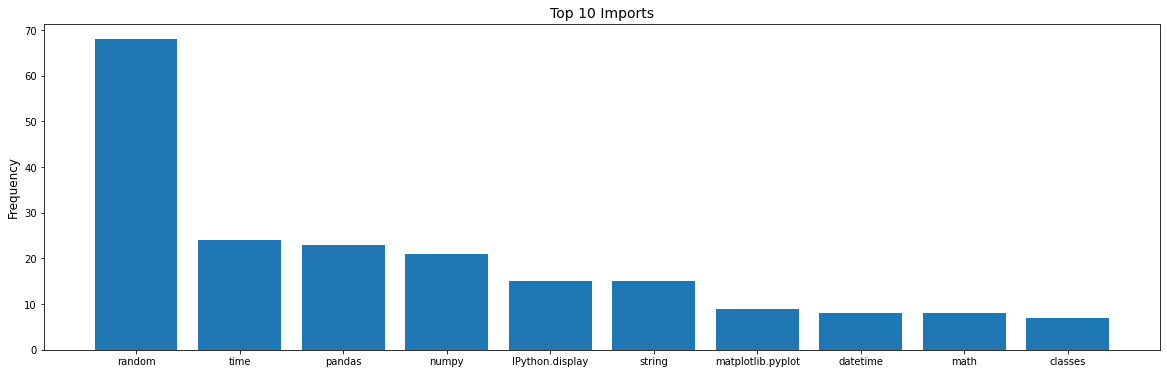

In [47]:
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(top_10_imports.index, top_10_imports.values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top 10 Imports", size = 14);

As shown in the graph, the most popular packages to import among all the projects are random, time, pandas, numpy, IPython.display, string, matplotlib.pyplot, math, and datetime. Next, I'll take at look at projects with higher scores to see if there was any difference.

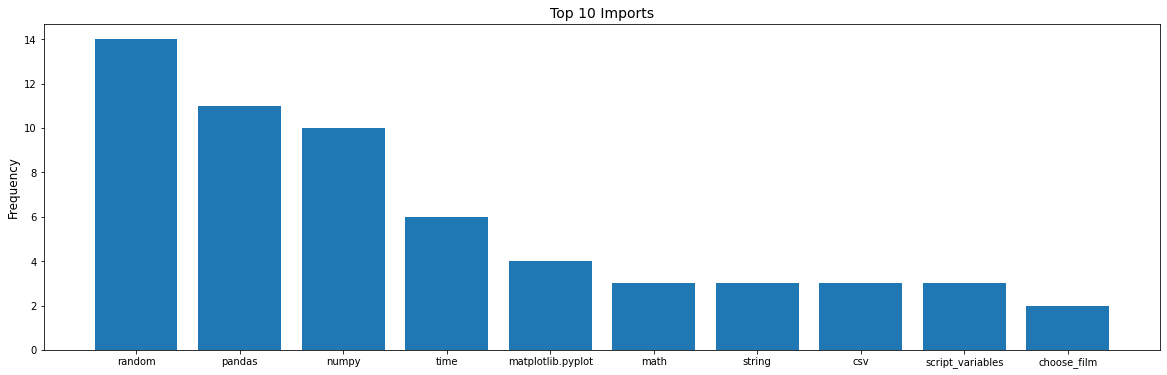

In [48]:
imports_high_score = to_1D(df_high_score["imports"]).value_counts()[2:12]
fig, ax = plt.subplots(figsize = (20,6))
ax.bar(imports_high_score.index, imports_high_score.values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top 10 Imports", size = 14);

The packages are pretty much the same, except that proportionaly speaking more projects imported data science related packages like pandas, numpy, matplotlib.pyplot, or csv. Next, I'll compare the distribution of total scores across projects with no imports and projects with at least one import.

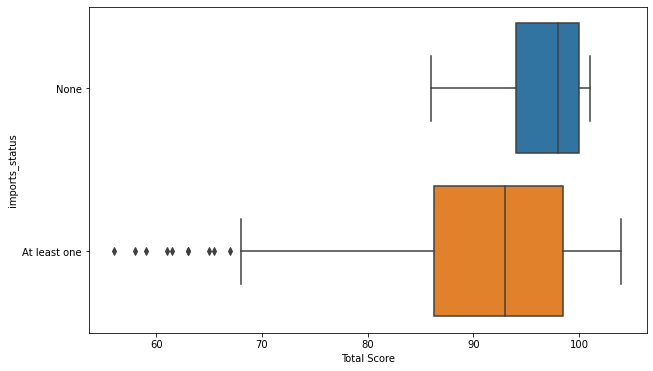

In [49]:
df['imports_status'] = np.where(df['num_imports']>0, "At least one", "None")
plt.figure(figsize=(10,6))
p = sns.boxplot(data=df, x="Total Score", y="imports_status");

As shown in the box plot, it is reasonable to say that the number of imports the projects have no significant impact on the total scores.
# <span style='color:blue '> Insight #5: It is optional for students to import external packages in their final projects. Some of the most popular packages students tend to import are random, time, pandas, numpy, IPython.display, string, matplotlib.pyplot, math, and datetime.</span>

[Jump Back to Table of Contents](#Top)

### Complexity (functions, classes, logics, loops) <a class="anchor" id="Complexity"></a>

To begin with, I'll look into distributions of these four variables.

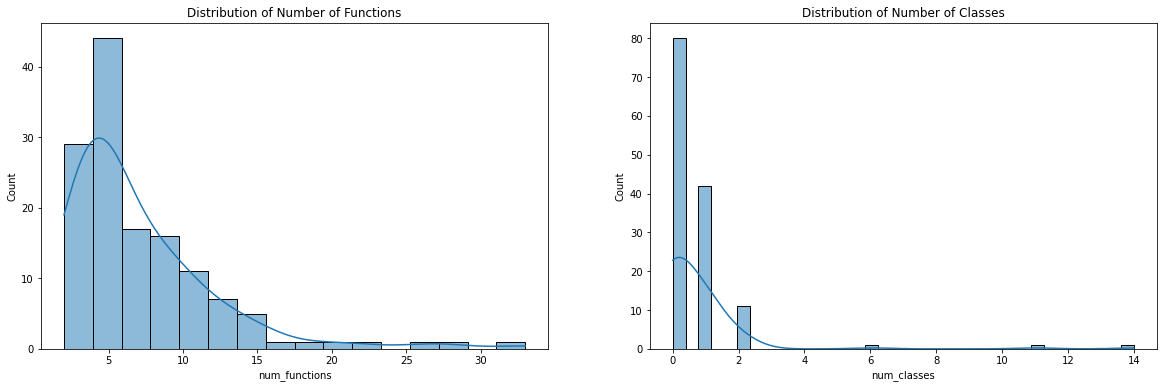

In [50]:
# Distribution of number of functions and classes
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.histplot(df["num_functions"], kde=True);
p.set_title("Distribution of Number of Functions");
plt.subplot(1,2,2)
p = sns.histplot(df["num_classes"], kde=True);
p.set_title("Distribution of Number of Classes");

As shown in the histograms, most projects contain around five functions and zero classes. This make sense as class is directly related to object-oriented programming, which, while introduced, is not the main focus of this introductory course. 

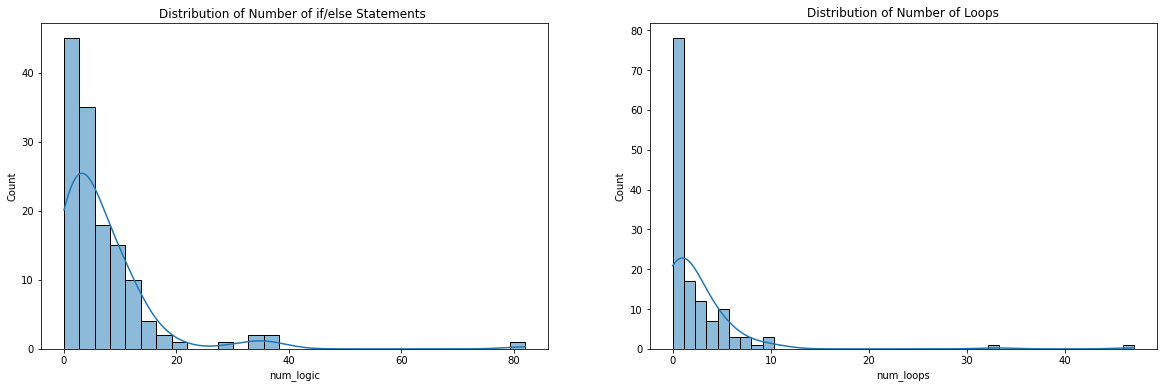

In [51]:
# Distribution of number of if/else statements and loops
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.histplot(df["num_logic"], kde=True);
p.set_title("Distribution of Number of if/else Statements ");
plt.subplot(1,2,2)
p = sns.histplot(df["num_loops"], kde=True);
p.set_title("Distribution of Number of Loops");

Most projects have no if/else statements or loops. This is also reasonable considering that it is an introductory course. While most projects have similar levels of complexity, I expect that these variable wouldn't significantly influence total scores. The following box plots would present the distributions of total scores across projects that have at least one function, class, logic, and loop and projects with none of them.

In [52]:
df['function'] = np.where(df['num_functions']>0, "At least one", "None")
df['class'] = np.where(df['num_classes']>0, "At least one", "None")
df['if/else'] = np.where(df['num_logic']>0, "At least one", "None")
df['loop'] = np.where(df['num_loops']>0, "At least one", "None")

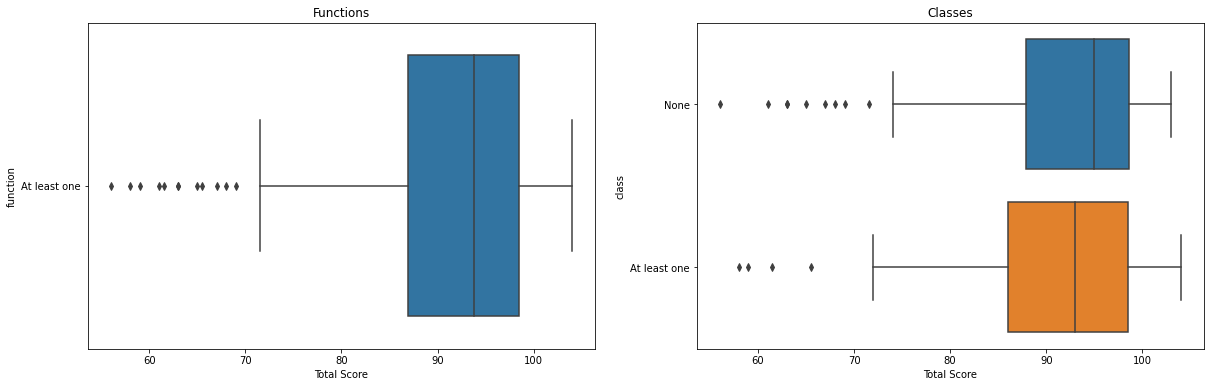

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.boxplot(data=df, x="Total Score", y='function')
p.set_title("Functions")
plt.subplot(1,2,2)
p = sns.boxplot(data=df, x="Total Score", y='class')
p.set_title("Classes");

From the box plot on the left, we can see that all projects have at least one function. From the boxplot on the right, we can see that in terms of the ranges and percentiles, projects with at least one class scored very similarly to projects with none, which indicates that the number of classes a project contains doesn't significantly affect its total score.

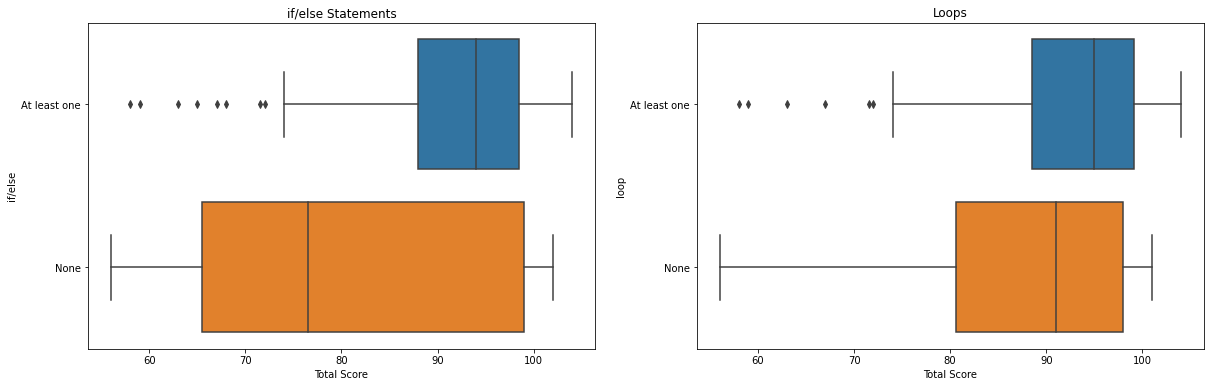

In [54]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.boxplot(data=df, x="Total Score", y='if/else')
p.set_title("if/else Statements")
plt.subplot(1,2,2)
p = sns.boxplot(data=df, x="Total Score", y='loop')
p.set_title("Loops");

On the other hand, the number of if/else statements and loops does seem to affect total scores. Disregarding the outliers, the median total score of projects with at least one if/else statement is much higher than the median with none. And for loops, the difference of medians is not as significant, but the difference of the minimums and 25% percentiles still indicate a solid impact. Finally, I'll look into the high-score projects to gain more insights.

In [55]:
df_high_score[["num_functions", "num_classes", "num_logic", "num_loops"]].describe()

,num_functions,num_classes,num_logic,num_loops
count,33.000000,33.000000,33.000000,33.000000
mean,7.030303,0.484848,5.969697,3.909091
std,3.404821,0.667140,5.531076,8.133125
min,3.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,1.000000,1.000000
50%,6.000000,0.000000,5.000000,2.000000
75%,9.000000,1.000000,9.000000,4.000000
max,15.000000,2.000000,20.000000,47.000000


# <span style='color:blue '> Insight #6: All final projects should have some functions to increase code clarity and readability. It is optional to include classes. Students should be encouraged to use if/else statements and loops in their projects. A typical well-performing project has around 5 to 9 functions, 1 to 9 if/else statements, and 1 to 4 for/while loops.</span>

[Jump Back to Table of Contents](#Top)

### Tests <a class="anchor" id="Tests"></a>

Test functions are also required as part of the final projects. A minimum of three test functions is required on the rubric, so I expect that projects with less than three test functions would have lower scores, and all other projects would remain unaffected.

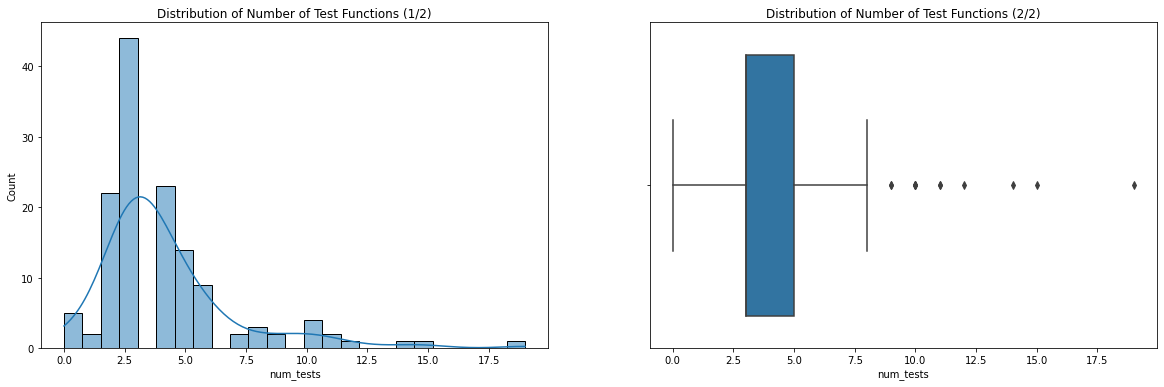

In [56]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.histplot(df["num_tests"], kde=True);
p.set_title("Distribution of Number of Test Functions (1/2)");
plt.subplot(1,2,2)
p = sns.boxplot(data=df, x="num_tests");
p.set_title("Distribution of Number of Test Functions (2/2)");

As I expected, based on the distribution, most projects have three test cases. Next, I'll compare the distribution of total scores of projects with three or more test cases and projects with less test cases to see the actual impact.

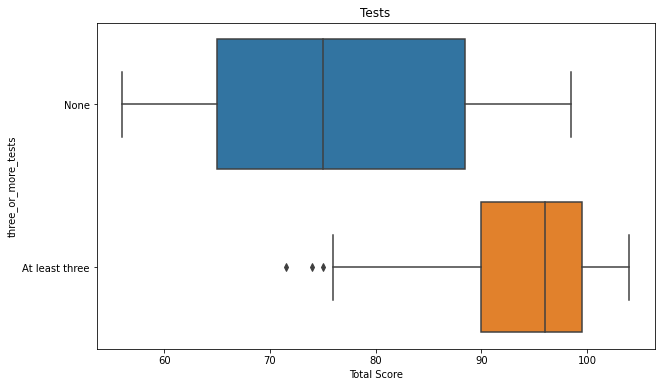

In [57]:
df['three_or_more_tests'] = np.where(df['num_tests']>=3, "At least three", "None")
plt.figure(figsize=(10,6))
p = sns.boxplot(data=df, x="Total Score", y='three_or_more_tests')
p.set_title("Tests");

As shown in the box plot, it is obvious that projects with at least three test cases scored significantly higher. 
# <span style='color:blue '> Insight #7: Students should have at least three test cases in their projects. It is part of the requirement and could directly affect the total score.</span>

[Jump Back to Table of Contents](#Top)

### Instructors <a class="anchor" id="Instructors"></a>

To conclude EDA, I'll take a look at total scores given by different instructors to see if the grading standard is consistent.

In [58]:
df_Ellis = df[df["instructor"]=="Ellis"]
print(df_Ellis["Total Score"].describe())

count     44.000000
mean      91.725000
std       11.789316
min       56.000000
25%       90.000000
50%       95.750000
75%       98.625000
max      103.500000
Name: Total Score, dtype: float64


In [59]:
df_Bardolph = df[df["instructor"]=="Bardolph"]
df_Bardolph["Total Score"].describe()

count     92.000000
mean      89.777174
std       11.243402
min       58.000000
25%       85.875000
50%       92.250000
75%       98.125000
max      104.000000
Name: Total Score, dtype: float64

Overall, the average total score given by professor Ellis is slightly higher; this could be due to the fact that there are fewer data points from professor Ellis in the dataset, as the overall distribution of scores is quite similar between professors (see below). 

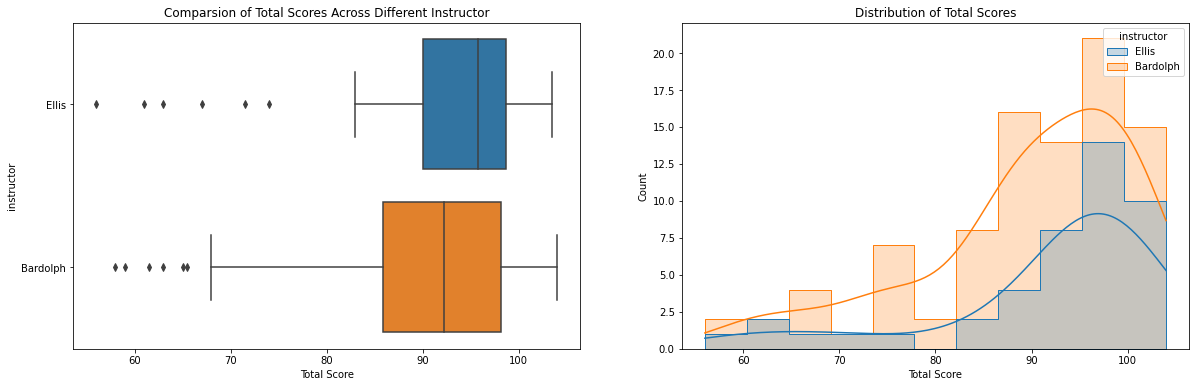

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
p = sns.boxplot(data=df, x="Total Score", y="instructor")
p.set_title("Comparsion of Total Scores Across Different Instructor")
plt.subplot(1,2,2)
p = sns.histplot(df, x="Total Score", hue="instructor", element="step", kde=True)
p.set_title("Distribution of Total Scores");

As shown in the histogram, the shapes of these distributions are fairly similar, which also indicate that the difference is likely due to different sample size.
# <span style='color:blue '> Insight #8: The grading standards for the final project are the fairly consistent across the two instructors. Students can create successful projects no matter who the instructor is.</span>

[Jump Back to Table of Contents](#Top)

# Analysis <a class="anchor" id="Analysis"></a>

For this section, I will be exploring the question of what makes a project good in a more statistical scope. Since no strong linear correlations were found bewteen total scores and the numerical variables, I decided to fit my data into a decision tree model for further analysis.I will create a new column to label projects that scored above the 75 percentile as 1 (indicating a strong project) and 0 for all other projects. I'll also rearrange the features and create a new dataframe to store all the relevant features that are ready to fit into the model.

### Preparing the dataframe <a class="anchor" id="Preparing_the_dataframe"></a>

In [61]:
# labeling and rearranging the dataframe
df['well_performing'] = np.where(df['Total Score']>98.5, 1, 0)
feature_cols = ['programming_background', 
               'lines_code', 
               'num_imports', 
               'lines_comments', 
               'num_functions', 
               'num_classes', 
               'num_tests', 
               'num_logic', 
               'num_loops', 
               'Describe and implement best practices in Python, keeping in mind that programming is done by and for humans',
               'Program at an introductory level in the Python programming language',
               'Solve basic problems using programmatic solutions',
               'Write and debug small Python programs',
               'Read basic Python programs, recognizing the structures they use and be able to explain how they work',
               'Execute Python programs on your local computer, using notebooks and the command line', 'well_performing']
df_model = df[feature_cols]

In [62]:
# change programming_background to numerical
def convert_background(row):
    background = row["programming_background"]
    if background == 'None':
        return 0
    elif background == 'Other':
        return 1
    elif background == 'Java/C/C++/Javascript':
        return 2
    elif background == 'Python+':
        return 3
    elif background == 'Python':
        return 4
    
df_model = df_model.copy()
df_model["programming_background"] = df.apply (lambda row: convert_background(row), axis=1)

In [63]:
# assigning the features
X = df_model[feature_cols[:-1]]
y = df_model["well_performing"]


In [64]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

[Jump Back to Table of Contents](#Top)

### Decision tree <a class="anchor" id="Decision_tree"></a>

The decision tree model would present statistical classifications that weren't discovered in EDA.

In [65]:
# fitting the decision tree model
model_1 = DecisionTreeClassifier(max_depth=3)
model_1 = model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

In [66]:
model_1.score(X_test, y_test)

0.7073170731707317

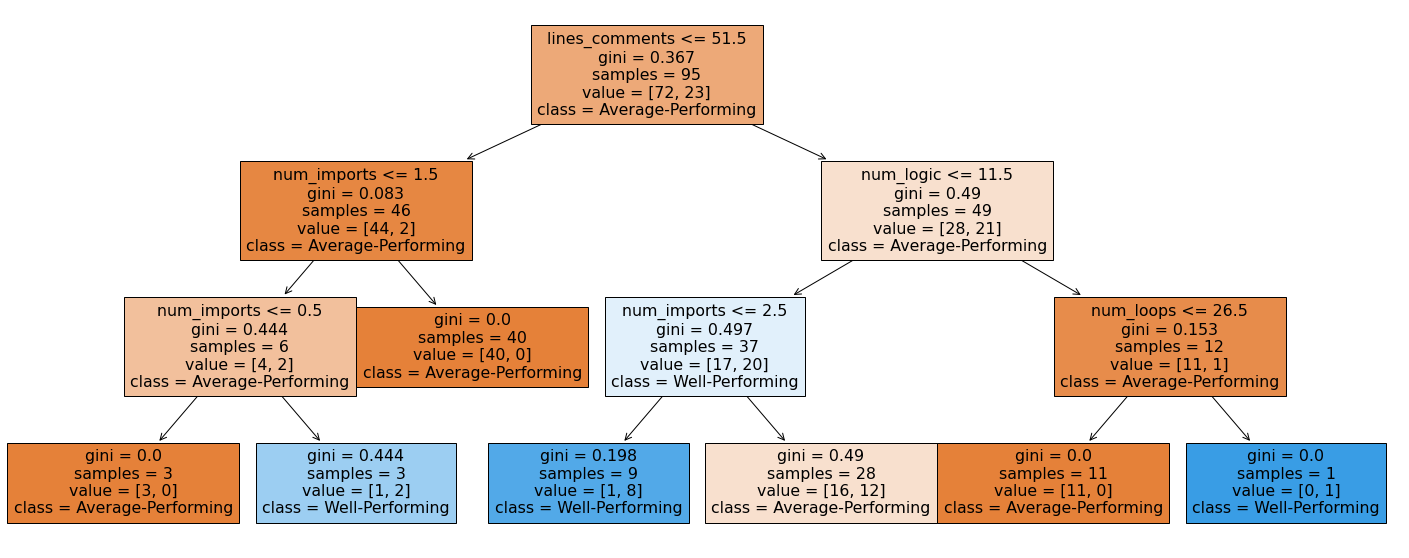

In [67]:
# visualizing the decision tree
plt.figure(figsize=(25,10))
tree.plot_tree(model_1,
               feature_names = feature_cols[:-1],
               class_names = ["Average-Performing", "Well-Performing"],
               filled = True);

From the visualization, we can see that lines of comments, lines of code, number of imports, number of if/else statements and number of for/while loops all have some degrees of impact on a project's performance. Students could use the visualization above as a reference when creating their projects.

[Jump Back to Table of Contents](#Top)

### Random forest <a class="anchor" id="Random_forest"></a>

Out of curiosity, I would like to see how much the accuracy of the prediction would increase if I use a random forest model.

In [68]:
# fitting the random forest model
model_2=RandomForestClassifier(n_estimators=100)
model_2 = model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)

In [69]:
model_2.score(X_test,y_test)

0.7317073170731707

The accuracy did increse by three percent, but its practical impact is negligible.

[Jump Back to Table of Contents](#Top)

# Conclusion <a class="anchor" id="Conclusion"></a>

Overall, for this COGS199 research project, I quantitatively analyzed COGS 18 final projects from more than 100 students. Throughout this analysis, I looked into correlations/classifications of these projects' total scores and related numerical/categorical variables extracted from them. The research question were answered through the form of insights, and these insights can inspire to data-driven decision that help and guide future students to be more successful in COGS18. Here is the full list of the insights:
1. Students with a programming background before entering the class do not have an advantage on the final project. Students with no background can in fact score higher, therefore should be encouraged to complete the final project.

2. Students who already have programming skills before entering this class are not guaranteed to perform better on the final project. Among the skills, knowing how to "Program at an introductory level in the Python programming language", "Write and debug small Python programs", and "Read basic Python programs, recognizing the structures they use and be able to explain how they work" can be helpful, and students can definitely acquire these skills throughout the class.

3. It is a misconception that longer projects would receive higher scores. Students should aim for better quality rather than longer length. A typical good project has approximately 50 to 140 lines of code.

4. Documenting code is part of writing good code. In the scope of this course, projects with high scores tend to have more code documentation. A typical well-performing project has around 60 to 130 lines of comments, on par with lines of code.

5. It is optional for students to import external packages in their final projects. Some of the most popular packages students tend to import are random, time, pandas, numpy, IPython.display, string, matplotlib.pyplot, math, and datetime.

6. All final projects should have some functions to increase code clarity and readability. It is optional to include classes. Students should be encouraged to use if/else statements and loops in their projects. A typical well-performing project has around 5 to 9 functions, 1 to 9 if/else statements, and 1 to 4 for/while loops.

7. Students should have at least three test cases in their projects. It is part of the requirement and could directly affect the total score.

8. The grading standards for the final project are the fairly consistent across the two instructors. Students can create successful projects no matter who the instructor is.

[Jump Back to Table of Contents](#Top)